In [1]:
import os
import json
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

In [2]:
# path_list의 파일에서 col 변수에 해당하는 컬럼 값들을 가져온다.
def get_column_data(path_list, div, col):
    col_data = []
    for path in path_list:
        h = h5py.File(path, 'r')
        col_data.append(h[div][col][:])
        h.close()
    return np.concatenate(col_data)

# path_list의 파일에서 학습에 필요한 컬럼들을 DataFrame 포맷으로 반환한다.
def get_dataframe(path_list, div):
    pids = get_column_data(path_list, div, col='pid')
    products = get_column_data(path_list, div, col='product')
    brands = get_column_data(path_list, div, col='brand')
    makers = get_column_data(path_list, div, col='maker')
    # 16GB를 가진 PC에서 실행 가능하도록 메모리를 많이 사용하는 칼럼은 주석처리
    # models = get_column_data(path_list, div, col='model') 
    prices = get_column_data(path_list, div, col='price')
    updttms = get_column_data(path_list, div, col='updttm')
    bcates = get_column_data(path_list, div, col='bcateid')
    mcates = get_column_data(path_list, div, col='mcateid')
    scates = get_column_data(path_list, div, col='scateid')
    dcates = get_column_data(path_list, div, col='dcateid')
    
    df = pd.DataFrame({'pid': pids, 'product':products, 'brand':brands, 'maker':makers, 
                                      #'model':models, 
                                      'price':prices, 'updttm':updttms, 
                                      'bcateid':bcates, 'mcateid':mcates, 'scateid':scates, 'dcateid':dcates} )
    
    # 바이트 열로 인코딩 상품제목과 상품ID를 유니코드 변환한다.
    df['pid'] = df['pid'].map(lambda x: x.decode('utf-8'))
    df['product'] = df['product'].map(lambda x: x.decode('utf-8'))
    df['brand'] = df['brand'].map(lambda x: x.decode('utf-8'))
    df['maker'] = df['maker'].map(lambda x: x.decode('utf-8'))
    # df['model'] = df['model'].map(lambda x: x.decode('utf-8')) # 메모리 사용량을 줄이기 위해 주석처리
    df['updttm'] = df['updttm'].map(lambda x: x.decode('utf-8'))     
    
    return df

In [3]:
train_df = get_dataframe(['train.chunk.01'], 'train')

In [4]:
train_df

,pid,product,brand,maker,price,updttm,bcateid,mcateid,scateid,dcateid
0,O4486751463,직소퍼즐 - 1000조각 바다거북의 여행 (PL1275),퍼즐라이프,상품상세설명 참조,16520,20180227091029,1,1,2,-1
1,P3307178849,[모리케이스]아이폰6S/6S+ tree farm101 - 다이어리케이스[바보사랑][...,바보사랑,MORY|해당없음,20370,20180429085019,3,3,4,-1
2,R4424255515,크리비아 기모 3부 속바지 GLG4314P,크리비아,,-1,20180426102314,5,5,6,-1
3,F3334315393,[하프클럽/잭앤질]남성 솔리드 절개라인 포인트 포켓 팬츠 31133PT002_NA,잭앤질,㈜크리스패션,16280,20180422084512,7,7,8,-1
4,N731678492,코드프리혈당시험지50매/코드프리시험지/최장유효기간,,기타,-1,20180424071623,10,9,11,-1
...,...,...,...,...,...,...,...,...,...,...
999995,Q4697414634,카렉스 노블맨 웰빙목주시트,,기타,-1,20180417132148,34,136,199,-1
999996,N4402110844,아이숲 챠밍래빗 쟈가드 편면내의,아이숲,,-1,20180220125334,5,64,80,-1
999997,Q4029646876,앞포켓크로스백T-131 숄더백 패션크로스백 크로스가방,크로바패션,크로바패션 / 크로바패션,15940,20180427091109,14,141,726,-1
999998,O1952838815,정식판매처 QNAP TS-121 하드미포함 당일배송,,기타 (미입력),-1,20180429212329,24,255,1127,-1


In [5]:
# 카테고리 이름과 ID의 매핑 정보를 불러온다.
cate_json = json.load(open(os.path.join('D:/빅데이터분석', 'cate1.json'), encoding='UTF-8'))

# (이름, ID) 순서를 (ID, 이름)으로 바꾼 후 dictionary로 만든다.
bid2nm = dict([(cid, name) for name, cid in cate_json['b'].items()])
mid2nm = dict([(cid, name) for name, cid in cate_json['m'].items()])
sid2nm = dict([(cid, name) for name, cid in cate_json['s'].items()])
did2nm = dict([(cid, name) for name, cid in cate_json['d'].items()])

# dictionary를 활용해 카테고리 ID에 해당하는 카테고리 이름 컬럼을 추가한다.
train_df['bcatenm'] = train_df['bcateid'].map(bid2nm)
train_df['mcatenm'] = train_df['mcateid'].map(mid2nm)
train_df['scatenm'] = train_df['scateid'].map(sid2nm)
train_df['dcatenm'] = train_df['dcateid'].map(did2nm)

In [6]:
df = train_df[['pid', 'product', 'brand', 'maker','price', 'bcatenm', 'mcatenm', 'scatenm', 'dcatenm']]
df

,pid,product,brand,maker,price,bcatenm,mcatenm,scatenm,dcatenm
0,O4486751463,직소퍼즐 - 1000조각 바다거북의 여행 (PL1275),퍼즐라이프,상품상세설명 참조,16520,악기/취미/만들기,보드게임/퍼즐,직소/퍼즐,
1,P3307178849,[모리케이스]아이폰6S/6S+ tree farm101 - 다이어리케이스[바보사랑][...,바보사랑,MORY|해당없음,20370,휴대폰/액세서리,휴대폰액세서리,아이폰액세서리,
2,R4424255515,크리비아 기모 3부 속바지 GLG4314P,크리비아,,-1,언더웨어,보정언더웨어,속바지/속치마,
3,F3334315393,[하프클럽/잭앤질]남성 솔리드 절개라인 포인트 포켓 팬츠 31133PT002_NA,잭앤질,㈜크리스패션,16280,남성의류,바지,일자면바지,
4,N731678492,코드프리혈당시험지50매/코드프리시험지/최장유효기간,,기타,-1,건강관리/실버용품,건강측정용품,혈당지,
...,...,...,...,...,...,...,...,...,...
999995,Q4697414634,카렉스 노블맨 웰빙목주시트,,기타,-1,자동차용품,시트커버/매트,여름 시트,
999996,N4402110844,아이숲 챠밍래빗 쟈가드 편면내의,아이숲,,-1,언더웨어,아동언더웨어,아동 내복/내의,
999997,Q4029646876,앞포켓크로스백T-131 숄더백 패션크로스백 크로스가방,크로바패션,크로바패션 / 크로바패션,15940,가방/지갑/잡화,캐주얼가방,캐주얼 토트백,
999998,O1952838815,정식판매처 QNAP TS-121 하드미포함 당일배송,,기타 (미입력),-1,프린터/PC주변/사무기기,저장장치,외장하드,


In [7]:
# 특정 칼럼에서 고윳값별로 등장 빈도수를 기록
def get_vc_df(df, col):    
    vc_df = df[col].value_counts().reset_index()
    vc_df.columns = [col, 'count']
    vc_df['percentage'] = (vc_df['count'] / vc_df['count'].sum())*100    
    return vc_df

In [8]:
# train_df의 brand 칼럼의 빈도수 테이블을 가져와서 상단 10개의 행만 출력
# 비어있는 값이 많음
vc_df = get_vc_df(df, 'brand')
vc_df.head(10)

,brand,count,percentage
0,,253224,25.3224
1,바보사랑,14064,1.4064
2,상품상세설명 참조,9078,0.9078
3,아디다스,8300,0.8300
4,아트박스,6871,0.6871
5,오가닉맘,6867,0.6867
6,나이키,5087,0.5087
7,꾸밈,4629,0.4629
8,기타,3994,0.3994
9,1300K,3925,0.3925


In [9]:
# 제조사 고윳값 빈도수
# 칼럼이 비어있거나 '상품상세설명 참조', '기타' 등으로 타깃 예측에 도움이 안 되는 데이터가 많음
vc_df = get_vc_df(df, 'maker')
vc_df.head(10)

,maker,count,percentage
0,기타,200473,20.0473
1,,141806,14.1806
2,상품상세설명 참조,25463,2.5463
3,아디다스,7530,0.7530
4,LF,6389,0.6389
5,꾸밈,6066,0.6066
6,La Diosa,4180,0.4180
7,[불명],4140,0.4140
8,나이키,4042,0.4042
9,삼성물산 패션부문,3768,0.3768


In [10]:
# price
# -1 값 (가격 정보 없음)이 상당수 포함돼 있음
vc_df = get_vc_df(df, 'price')
vc_df.head(10)

,price,count,percentage
0,-1,628804,62.8804
1,14880,555,0.0555
2,12000,544,0.0544
3,19800,499,0.0499
4,9900,488,0.0488
5,14000,484,0.0484
6,19000,459,0.0459
7,28000,449,0.0449
8,18000,447,0.0447
9,14400,410,0.0410


In [11]:
# product
# product 칼럼은 비어있는 값이 존재하지 않고 다양한 제품명이 존재함
vc_df = get_vc_df(df, 'product')
vc_df.head(10)

,product,count,percentage
0,DIY 돌하우스 로맨틱해변별장 미니어쳐 만들기,28,0.0028
1,아이폰7 플러스 저반사 지문방지 액정보호필름,26,0.0026
2,브리츠 휴대용 블루투스 스피커 BZ-A660 Sound Dome,24,0.0024
3,퀸센스평철주전자7L,24,0.0024
4,GB5011 대형 월넛 원형 벽시계 50cm 제조한국,24,0.0024
5,[오로라] QM500S 호조 에디션 보조배터리 5000mah,24,0.0024
6,땡큐파머 미라클에이지 리페어크림50ml,23,0.0023
7,스테판조셉 스테인레스 물병 무당벌레,22,0.0022
8,DIY 돌하우스 엔젤하우스 미니어쳐 만들기,22,0.0022
9,클립형 (블루투스스피커) 이소닉 BT-102 무선스피커,22,0.0022


In [12]:
# bcateid 대분류
# 타깃값, 가방/지갑/잡화 제품이 제일 많지만 퍼센트가 압도적으로 많은건 아님
vc_df = get_vc_df(df, 'bcatenm')
vc_df.head(10)

,bcatenm,count,percentage
0,가방/지갑/잡화,100729,10.0729
1,여성의류,87815,8.7815
2,쥬얼리/시계/액세서리,63878,6.3878
3,남성의류,61044,6.1044
4,스포츠의류/운동화/잡화,56880,5.6880
5,신발/수제화,50599,5.0599
6,유아동의류/신발/가방,45166,4.5166
7,휴대폰/액세서리,44249,4.4249
8,언더웨어,42974,4.2974
9,산업/공구/안전용품,29779,2.9779


In [13]:
# brand, maker 칼럼에는 비어있는 값 혹은 예측에 도움이 안되는 데이터가 많음
# brand, maker 칼럼은 product인 상품명에 이미 포함된 정보인 경우가 많음
# 가격의 경우 데이터가 없는 경우가 많고 상품에 가격 매기는 기준이 다양할 수 있어 제거
# 불필요한 칼럼을 제거한 데이터프레임 만들기
train_df = train_df[['pid', 'product', 'bcateid', 'mcateid', 'scateid', 'dcateid']]
train_df.head()

,pid,product,bcateid,mcateid,scateid,dcateid
0,O4486751463,직소퍼즐 - 1000조각 바다거북의 여행 (PL1275),1,1,2,-1
1,P3307178849,[모리케이스]아이폰6S/6S+ tree farm101 - 다이어리케이스[바보사랑][...,3,3,4,-1
2,R4424255515,크리비아 기모 3부 속바지 GLG4314P,5,5,6,-1
3,F3334315393,[하프클럽/잭앤질]남성 솔리드 절개라인 포인트 포켓 팬츠 31133PT002_NA,7,7,8,-1
4,N731678492,코드프리혈당시험지50매/코드프리시험지/최장유효기간,10,9,11,-1


In [14]:
# train_df.to_csv('상품명.csv', index=False, encoding='utf-8-sig')

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   pid      1000000 non-null  object
 1   product  1000000 non-null  object
 2   bcateid  1000000 non-null  int32 
 3   mcateid  1000000 non-null  int32 
 4   scateid  1000000 non-null  int32 
 5   dcateid  1000000 non-null  int32 
dtypes: int32(4), object(2)
memory usage: 30.5+ MB


In [16]:
# train_df['bcateid'] = train_df['bcateid'].astype('str')
# train_df['mcateid'] = train_df['mcateid'].astype('str')
# train_df['scateid'] = train_df['scateid'].astype('str')
# train_df['dcateid'] = train_df['dcateid'].astype('str')

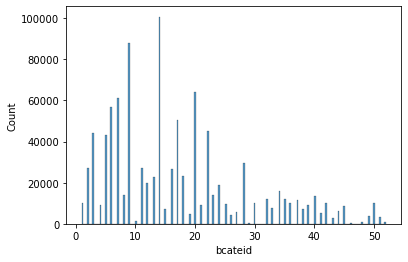

In [17]:
# 대분류 분포를 보기 위한 히스토그램
# 데이터 불균형 문제는 비교적 없음
sns.histplot(train_df['bcateid'])

plt.show()

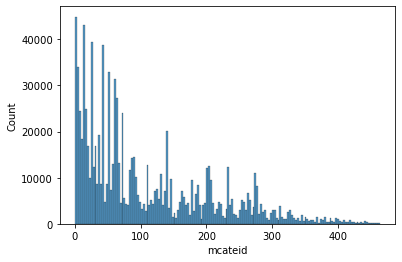

In [18]:
# 중분류 분포를 보기 위한 히스토그램
sns.histplot(train_df['mcateid'])

plt.show()

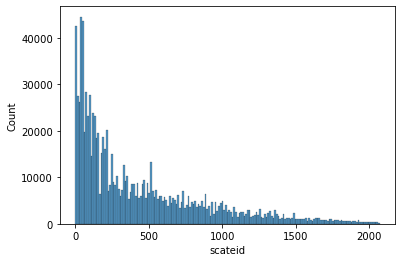

In [19]:
# 소분류 분포를 보기 위한 히스토그램
sns.histplot(train_df['scateid'])

plt.show()

# 데이터 전처리

In [20]:
# 특수기호 제거
import re

# 특수기호를 나열한 패턴 문자열을 컴파일하여 패턴 객체를 얻는다.
p = re.compile('[\!@#$%\^&\*\(\)\-\=\[\]\{\}\.,/\?~\+\'"|_:;><`┃]')

# 문장의 특수기호 제거 함수
def remove_special_characters(sentence, lower=True):
    sentence = p.sub(' ', sentence) # 패턴 객체로 sentence 내의 특수기호를 공백문자로 치환한다.
    sentence = ' '.join(sentence.split()) # sentence 내의 두개 이상 연속된 빈공백들을 하나의 빈공백으로 만든다.
    if lower:
        sentence = sentence.lower()
    return sentence

# product 칼럼에 특수기호를 제거하는 함수를 적용한 결과를 반환한다.
train_df['product'] = train_df['product'].map(remove_special_characters)

train_df.head() # 특수기호가 제거된 train_df의 상단 5행만 출력

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_10184/268378834.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['product'] = train_df['product'].map(remove_special_characters)


,pid,product,bcateid,mcateid,scateid,dcateid
0,O4486751463,직소퍼즐 1000조각 바다거북의 여행 pl1275,1,1,2,-1
1,P3307178849,모리케이스 아이폰6s 6s tree farm101 다이어리케이스 바보사랑 무료배송,3,3,4,-1
2,R4424255515,크리비아 기모 3부 속바지 glg4314p,5,5,6,-1
3,F3334315393,하프클럽 잭앤질 남성 솔리드 절개라인 포인트 포켓 팬츠 31133pt002 na,7,7,8,-1
4,N731678492,코드프리혈당시험지50매 코드프리시험지 최장유효기간,10,9,11,-1


In [21]:
#word count
word_counts = train_df['product'].apply(lambda x:len(x.split(' ')))
word_counts.head()
word_counts.describe()

count    1000000.000000
mean           7.024293
std            2.594933
min            1.000000
25%            5.000000
50%            7.000000
75%            8.000000
max          109.000000
Name: product, dtype: float64

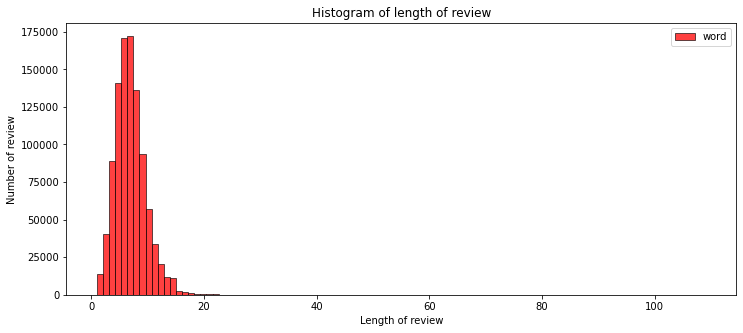

In [22]:
plt.figure(figsize=(12, 5))
ax = sns.histplot(word_counts,kde=False,bins=100,color='r')
ax.set_xlabel('Length of review')
ax.set_ylabel('Number of review')
ax.set_title('Histogram of length of review')
ax.legend(labels=['word'])
plt.show()

In [23]:
# 하나의 리스트로 만들어서 value_counts(), nunique()
one_list = train_df['product'].apply(lambda x:x.split(' '))
one_list

0                         [직소퍼즐, 1000조각, 바다거북의, 여행, pl1275]
1         [모리케이스, 아이폰6s, 6s, tree, farm101, 다이어리케이스, 바보사...
2                             [크리비아, 기모, 3부, 속바지, glg4314p]
3         [하프클럽, 잭앤질, 남성, 솔리드, 절개라인, 포인트, 포켓, 팬츠, 31133p...
4                           [코드프리혈당시험지50매, 코드프리시험지, 최장유효기간]
                                ...                        
999995                                   [카렉스, 노블맨, 웰빙목주시트]
999996                               [아이숲, 챠밍래빗, 쟈가드, 편면내의]
999997                  [앞포켓크로스백t, 131, 숄더백, 패션크로스백, 크로스가방]
999998                  [정식판매처, qnap, ts, 121, 하드미포함, 당일배송]
999999             [공식, 쿠첸, 자외선, 젖병, 식기살균건조기5인용, csd, e051]
Name: product, Length: 1000000, dtype: object

In [24]:
len(one_list)

1000000

In [25]:
len(one_list[0])

5

In [26]:
list_all = []
for i in range(len(one_list)):
    for j in range(len(one_list[i])):
        list_all.append(one_list[i][j])
list_all

['직소퍼즐',
 '1000조각',
 '바다거북의',
 '여행',
 'pl1275',
 '모리케이스',
 '아이폰6s',
 '6s',
 'tree',
 'farm101',
 '다이어리케이스',
 '바보사랑',
 '무료배송',
 '크리비아',
 '기모',
 '3부',
 '속바지',
 'glg4314p',
 '하프클럽',
 '잭앤질',
 '남성',
 '솔리드',
 '절개라인',
 '포인트',
 '포켓',
 '팬츠',
 '31133pt002',
 'na',
 '코드프리혈당시험지50매',
 '코드프리시험지',
 '최장유효기간',
 '아트박스',
 'poom',
 '낭만창고',
 'idk385',
 '시원한',
 '맥주',
 '캬하',
 '데버스',
 '뉴',
 '캠핑',
 'bbq',
 '글러브',
 'dvc',
 'e1209n',
 '캠핑',
 '등산',
 '엘르스포츠',
 '여성',
 '비키니2pcs',
 'etflb06nvy',
 '패션플러스',
 'geox',
 'geox',
 '제옥스',
 'gh',
 '405',
 '블랙펄',
 '클러치백',
 '아트박스',
 'poom',
 '꾸밈',
 'iz099',
 '우럭아왜우럭',
 's329',
 '저소음',
 '벽시계',
 '인테리어시계',
 '벽걸이시계',
 '생활소',
 '브라스파티',
 '리얼가죽',
 '브리짓',
 'bc2v3f2b77r',
 's아람',
 '한일',
 '전기',
 '미니온풍기',
 'hef',
 '600히터',
 '난방',
 '난로',
 '한일',
 '엘린',
 'elin',
 '올파이브',
 '통오중',
 '5ply',
 '냄비5종',
 '10pcs',
 '롯데아이몰',
 'qr인증',
 '매니아온',
 '비비아나',
 '스니커즈',
 '1eq156',
 'z32',
 '에뛰드하우스',
 '핑크',
 '생기',
 '워터',
 '세럼',
 '80ml',
 '수분',
 '에센스',
 '미국산',
 '와일드망고',
 '배부른것처럼',
 '500mg',
 'x180개x10병',
 '라마즈',

In [27]:
pd.Series(list_all)

0                직소퍼즐
1              1000조각
2               바다거북의
3                  여행
4              pl1275
              ...    
7024288           자외선
7024289            젖병
7024290    식기살균건조기5인용
7024291           csd
7024292          e051
Length: 7024293, dtype: object

In [28]:
pd.Series(list_all).value_counts()

여성            36450
롯데백화점         31993
현대백화점         31407
하프클럽          28942
남성            28439
              ...  
1026t             1
hktm74t04c        1
기모절개트레이닝바지        1
헤어컬링기             1
식기살균건조기5인용        1
Length: 861755, dtype: int64

In [29]:
# train_df.to_csv('데이터.csv', index=False, encoding = 'utf-8-sig')